## Projet d'Analyse Numérique



1) il s'agit d'une discrétisation du problème par différences finies


In [112]:
# les eternels imports
import numpy as np
import numpy.linalg as la
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt

Pour rappel, la fonction $R : \mathbb{R}^n \to \mathbb{R}^n$ est définie par

$$ (R(u))_i = \sum_{j \ne i, \ j=1}^{n} \left[ \frac{\sqrt{h}}{\sqrt{|i - j|}} (u_i^4 - u_j^4 ) \right] + \frac{\sqrt{h}}{2 \sqrt{i}}(u_i^4 - 1 ) + \frac{\sqrt{h}}{2 \sqrt{n + 1 - i}} (u_i^4 - 16) $$

In [113]:
n = 50
h = 1 / (n + 1)
h2 = h*h

def function_R(u):
    # input : u \in R^n
    R = []
    for i in range(n): 
        r_i = 0
        for j in range(n):
            if j != i:
                term = np.sqrt(h) * (u[i]**4 - u[j]**4) / np.sqrt(np.abs(i - j))
                r_i += term
        r_i += np.sqrt(h) * (u[i]**4 - 1) / (2 * np.sqrt(1 + i))
        r_i += np.sqrt(h) * (u[i]**4 - 16) / (2 * np.sqrt(n - i))
        R.append(r_i)
    #return np.zeros(n)
    return np.array(R, float)


A = np.zeros((n, n))
for j in range(n):
    for i in range(n):
        if j == i:
            A[i, j] = 2
        elif np.abs(j - i) == 1:
            A[i, j] = -1

A = A / (10 * h2)
print(A)

b = np.zeros(n)
b[0] = 1 / (10 * h2)
b[n-1] = 2 / (10 * h2)
print(b)

[[ 520.2 -260.1    0.  ...    0.     0.     0. ]
 [-260.1  520.2 -260.1 ...    0.     0.     0. ]
 [   0.  -260.1  520.2 ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ...  520.2 -260.1    0. ]
 [   0.     0.     0.  ... -260.1  520.2 -260.1]
 [   0.     0.     0.  ...    0.  -260.1  520.2]]
[260.1   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  520.2]


In [122]:
def methode_iterative(A, b, funcR, beta, u0=np.ones(n)):
    max_iter = 500
    iter = 0
    res = 1
    u = u0
    while iter < max_iter and res > 1e-7:
        # (A + beta I) uk+1 = -R(uk) + beta uk + b
        A_ = A + beta * np.identity(n)
        b_ = - funcR(u) + beta * u + b
        
        sol = la.solve(A_, b_)
        res = la.norm((u - sol))
        
        # --- test de monotonie ---
        # if np.min(u - sol) < 0:
        #   print("pas monotone", iter)
        # u = sol
        # --- fin du test de monotonie ---
        
        u = sol
        
        iter += 1
    return u, iter

57


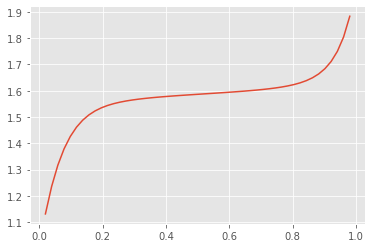

In [123]:
x = np.array([i*h for i in range(1, n+1)])
u, nb_iter = methode_iterative(A, b, function_R, 12)
print(nb_iter)
plt.plot(x, u)

b) faire des tests avec différents $\beta$ n=10, 12, 20, 30, 60 et 120 sont des bonnes valeurs

La valeur de $\beta$ va, toutefois, être impliquée dans le nombre d'itérations nécessaires à la convergence de la méthode. Une façon de rendre compte de cet effet, est de faire un petit graphique sur lequel nous avons en abscisses la valeur de $\beta$ et en ordonnée le nombre d'itérations avant d'obtenir la solution. Le code python suivant réalise ce que nous venons d'énoncer :

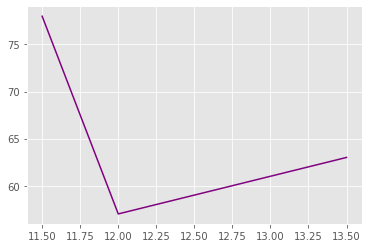

In [116]:
list_beta = np.linspace(11.5, 13.5, 5) # va de a à b avec n subdivision
list_iter = []

for beta in list_beta:
    sol, nb_iter = methode_iterative(A, b, beta)
    list_iter.append(nb_iter)
    
plt.style.use('ggplot')
plt.plot(list_beta, list_iter, 'purple')

La valeur de $\beta$ semble donc influencer, non-seulement, la convergence mais aussi le nombre d'itérations nécessaires à la méthode pour converger. Naturellement, on peut se demander si $\beta$ jouera aussi un rôle quant à la solution trouvée... Et la réponse est non ! En effet il suffit,pour cela, de se placer dans des conditions sous lesquelles la méthode converge puis écrire

$$  Au^{(k+1)} + \beta u^{(k+1)} = - R(u^{(k)}) + \beta u^{(k)} + b \ \biggr\vert_{k \to +\infty}$$

qui, sachant $u^{(k)} \to u$ lorsque $k$ grandit, donne

$$ Au + \beta u = -R(u) + \beta u + b$$

Les termes en $\beta u$ se simplifient pour donner

$$ Au = -R(u) + b $$

qui est solution du problème; solution dans laquelle $\beta$ n'intervient pas.

In [118]:
def new_R(u):
    # input : u \in R^n
    R = []
    for i in range(n): 
        r_i = 0
        for j in range(n):
            if j != i:
                term = 2 * np.sqrt(h) * (u[i]**4 - u[j]**4) / ( np.sqrt(np.abs(i - j) + 0.5) + np.sqrt(np.abs(i - j) - 0.5))
                r_i += term
        r_i += np.sqrt(h) * (u[i]**4 - 1) / (np.sqrt(1 + i) + np.sqrt(1 + i - 0.5))
        r_i += np.sqrt(h) * (u[i]**4 - 16) / (np.sqrt(n - i) + np.sqrt(n - i - 0.5))
        R.append(r_i)
    #return np.zeros(n)
    return np.array(R, float)

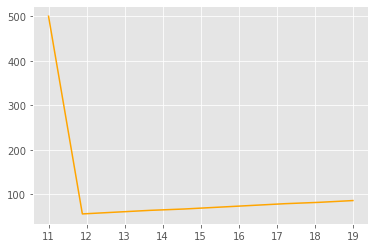

In [124]:
list_beta = np.linspace(11, 19, 10) # va de a à b avec n subdivision
list_iter = []

for beta in list_beta:
    sol, nb_iter = methode_iterative(A, b, new_R, beta)
    list_iter.append(nb_iter)
    
plt.style.use('ggplot')
plt.plot(list_beta, list_iter, 'orange')

**Remarque : La valeur du beta optimal n'a pas l'air d'avoir bougé**

In [125]:
newA = np.zeros((n, n))
for j in range(n):
    for i in range(n):
        if j == i:
            newA[i, j] = 2
        elif np.abs(j - i) == 1:
            newA[i, j] = -1

newA = newA / h2

43


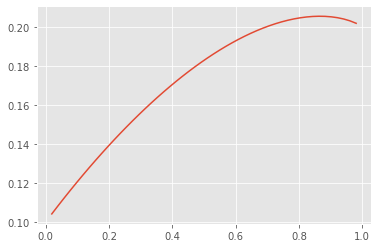

In [128]:
x = np.array([i*h for i in range(1, n+1)])
u, nb_iter = methode_iterative(newA, b, new_R, 20
                              
                              
                              
                              
                              
                              )
print(nb_iter)
plt.plot(x, u)

diffusion tellement forte qu'on ne voit plus le rayonnement (l'effet rayonnement disparait )